# Introdução
Esse trabalho tem o objetivo de analisar se o tempo passado na midia social Tik Tok  tem alguma influencia na saúde mental dos usuarios.

Para medir a saúde mental usaremos duas variáveis sendo elas um índice de humor e um indice de nivel de estresse. Ambas são separadas em grupos de 1 a 10, porém 10 é o melhor valor para o humor e o pior valor para o nivel de estresse.





#Base de dados

A base de dados é formada por 6 variaveis e delas 4 serão usadas, sendo elas:
"hours_on_TikTok", "sleep_hours", "stress_level" e "mood_score".
A saúde mental dos usuarios será medida pelo nivel de estresse e pelo índice de humor.

Nessas duas variaveis fizemos uma alteração na quantidade de grupos para facilitar a ánalise. Dos 10 grupos iniciais fizemos 3 grupos sendo eles:

Alto(3) - Para os grupos 8, 9 e 10

---


Médio(2) - Para os grupos 5, 6 e 7

---


Baixo(1) - Para os grupos 1, 2 ,3 e 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy.stats import kruskal
import numpy as np


df = pd.read_csv("digital_habits_vs_mental_health.csv")
df
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("digital_habits_vs_mental_health.csv")
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,10,5
1,6.5,5,3.5,6.2,8,8
2,9.1,4,2.8,6.6,7,8
3,6.5,3,2.5,6.5,7,9
4,2.1,3,1.2,7.8,2,10
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,10,9
99996,6.4,3,3.1,5.4,10,5
99997,3.7,3,1.5,8.3,4,10
99998,10.6,2,5.3,7.2,9,9


In [ ]:
df['mood_score'] = df['mood_score'].replace({2:1 , 3: 1, 4:1,  5: 2,  6: 2, 7:2 , 8: 3, 9: 3, 10:3})
df['stress_level'] = df['stress_level'].replace({2:1 , 3: 1, 4:1,  5: 2,  6: 2, 7:2 , 8: 3, 9: 3, 10:3})
df

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.3,2,5.3,4.4,3,2
1,6.5,5,3.5,6.2,3,3
2,9.1,4,2.8,6.6,2,3
3,6.5,3,2.5,6.5,2,3
4,2.1,3,1.2,7.8,1,3
...,...,...,...,...,...,...
99995,5.0,4,1.8,4.5,3,3
99996,6.4,3,3.1,5.4,3,2
99997,3.7,3,1.5,8.3,1,3
99998,10.6,2,5.3,7.2,3,3


# Ánalises
Vamos dividir as ánalise em duas, a primeira é verificar se as horas no tiktok e as horas de sono influencia no índice de humor. A segunda é se eles tem influencia no nível de estresse.

# Ánalise Indice de humor

### Analise Descritiva Indice de Humor

In [ ]:
descricao = df.groupby('mood_score')['hours_on_TikTok'].describe()
print(descricao)

              count      mean       std  min  25%  50%  75%  max
mood_score                                                      
1             403.0  3.941687  1.219779  1.3  3.0  4.0  4.9  6.8
2           13007.0  3.089021  1.152480  0.3  2.2  3.0  3.9  7.2
3           86590.0  2.290979  1.021839  0.2  1.5  2.2  2.9  7.1


Da ánalise acima podemos obeservar que a média de horas no tiktok cai em aproximadamente 1 hora do grupo 1 para o 2, e também cai aproximadamente uma hora do grupo 2 para o 3 (com o grupo 3 apresentando a menor média de tempo de tela) . Isso nos dá indicios de uma possível influencia de horas no tiktok sobre o indice de humor.

In [ ]:
descricao2 = df.groupby('mood_score')['sleep_hours'].describe()
print(descricao2)

              count      mean       std  min  25%  50%  75%   max
mood_score                                                       
1             403.0  3.951861  0.810175  3.0  3.2  3.9  4.5   6.5
2           13007.0  5.230607  1.065117  3.0  4.5  5.2  6.0   9.1
3           86590.0  7.266680  1.313456  3.0  6.3  7.2  8.2  10.0


Novamente podemos ver uma diferença de 1 hora entre os grupos 1 e 2, e uma diferença ainda maior do grupo 2 para o 3 (com o grupo 3 apresentando as maior média de horas de sono). Da mesma forma temos indicios de que as horas de sono podem influenciar no humor.

### Boxplots Indice de Humor

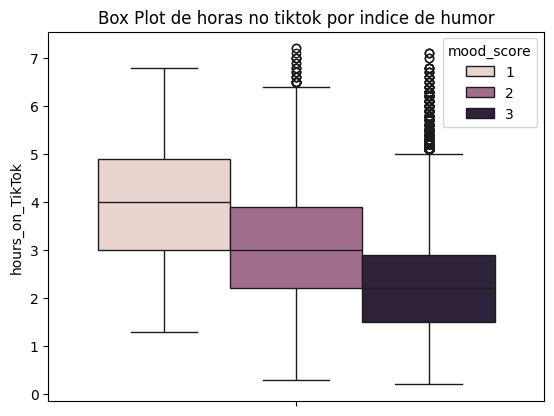

In [ ]:
sns.boxplot(y='hours_on_TikTok', hue='mood_score', data=df)

plt.title('Box Plot de horas no tiktok por indice de humor')
plt.show()

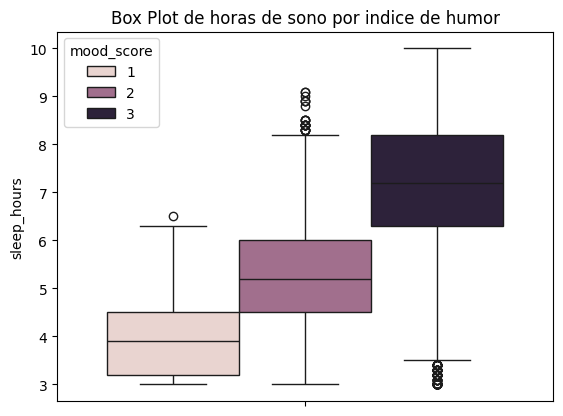

In [ ]:
sns.boxplot(y='sleep_hours', hue='mood_score', data=df)

plt.title('Box Plot de horas de sono por indice de humor')
plt.show()

Em ambos os boxplots nossas suspeitas, de que essas variaveis influenciam no indice de humor, ficam ainda mais evidentes principalmente entre os grupos 1 e 3 onde as caixas não se sobrepõe em nenhum dos boxplots.

Nos boxplots podemos observar varios outliers, mas como são muitos iremos tratar eles como uma assimetria vista nos grupos 2 e 3.

### Distribuição Indice de Humor

Para saber qual teste iremos aplicar para confirmar nossas suspeitas faremos primeiro um teste de normalidade. Se os dados seguem uma distribuição normal aplicaremos o Anova, caso contrário aplicaremos o teste não-paramétrico de Kruskal-Wallis.

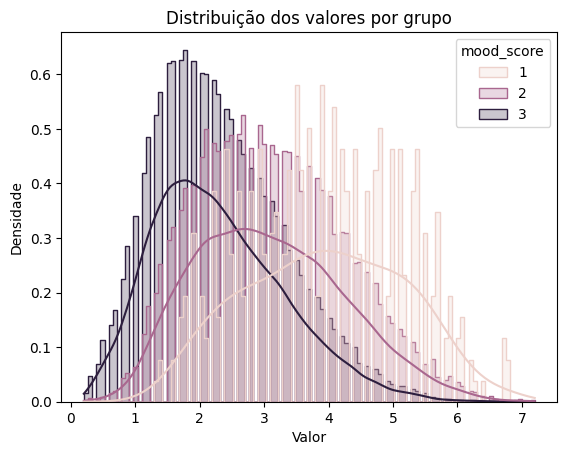

In [ ]:
sns.histplot(data=df, x='hours_on_TikTok', hue='mood_score', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição dos valores por grupo')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

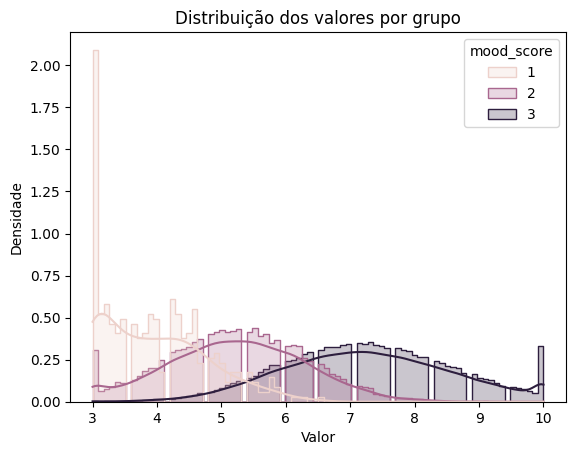

In [ ]:
sns.histplot(data=df, x='sleep_hours', hue='mood_score', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição dos valores por grupo')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

Observando os histogramas é difícil dize que os grupos seguem uma distribuição normal, principalmente em relação as horas de sono.

Para confirmar faremos um teste estatístico de normalidade

### Testes de Normalidade Indice de Humor




In [ ]:
for nome_grupo, grupo_df in df.groupby('mood_score'):
    if len(grupo_df) >= 20:
        stat, p = normaltest(grupo_df['hours_on_TikTok'])
        print(f"Grupo: {nome_grupo}")
        print(f"  Estatística: {stat:.4f}")
        print(f"  Valor-p: {p:.4f}")
        if p > 0.05:
            print(" Distribuição normal (não rejeita H0)")
        else:
            print(" Não é normal (rejeita H0)")
        print()
    else:
        print(f"Grupo {nome_grupo} tem menos de 20 elementos — teste ignorado.\n")


Grupo: 1
  Estatística: 29.7625
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 2
  Estatística: 363.6479
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 3
  Estatística: 4811.5982
  Valor-p: 0.0000
 Não é normal (rejeita H0)



In [ ]:
for nome_grupo, grupo_df in df.groupby('mood_score'):
    if len(grupo_df) >= 20:
        stat, p = normaltest(grupo_df['sleep_hours'])
        print(f"Grupo: {nome_grupo}")
        print(f"  Estatística: {stat:.4f}")
        print(f"  Valor-p: {p:.4f}")
        if p > 0.05:
            print(" Distribuição normal (não rejeita H0)")
        else:
            print(" Não é normal (rejeita H0)")
        print()
    else:
        print(f"Grupo {nome_grupo} tem menos de 20 elementos — teste ignorado.\n")


Grupo: 1
  Estatística: 26.5100
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 2
  Estatística: 69.0444
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 3
  Estatística: 806.9271
  Valor-p: 0.0000
 Não é normal (rejeita H0)



Os testes nos dão fortes evidências de que os grupos não tem distrubuição normais (com valor p extremamente baixo) e portanto seguiremos as ánalises como o teste de Kruskal-Wallis.

# Teste de Média índice de Humor

Agora iremos realizar o teste para confirmar se há alguma diferença estatísticamente significante entre as médias, de horas no tik tok e de sono, para cada grupo

Para o teste temos:

H0: Não há diferença significativa entre as médias dos grupos

H1: Há diferença significativa entre as médias dos grupos

In [ ]:
grupos = [grupo_df['hours_on_TikTok'].values for nome, grupo_df in df.groupby('mood_score')]

stat, p = kruskal(*grupos)

print(f'Estatística H: {stat:.4f}')
print(f'Valor-p: {p:.4f}')

if p > 0.05:
    print("Não há diferença significativa entre as médias dos grupos (não rejeita H0)")
else:
    print("Há diferença significativa entre as médias dos grupos (rejeita H0)")

Estatística H: 5828.0917
Valor-p: 0.0000
Há diferença significativa entre as médias dos grupos (rejeita H0)


In [ ]:
grupos = [grupo_df['sleep_hours'].values for nome, grupo_df in df.groupby('mood_score')]

stat, p = kruskal(*grupos)

print(f'Estatística H: {stat:.4f}')
print(f'Valor-p: {p:.4f}')

if p > 0.05:
    print("Não há diferença significativa entre os grupos (não rejeita H0)")
else:
    print("Há diferença significativa entre os grupos (rejeita H0)")

Estatística H: 20978.5231
Valor-p: 0.0000
Há diferença significativa entre os grupos (rejeita H0)


De acordo com o resultado dos testes rejeitamos a H0 para ambos, e portanto as médias tem diferença estatísticamente significante e temos fortes evidências de que ambas variáveis tem influência no índice de humor.

# Ánalise Nivel de Estresse

### Analise Descritiva Nível de Estresse

In [ ]:
descricao3 = df.groupby('stress_level')['hours_on_TikTok'].describe()
print(descricao3)

                count      mean       std  min  25%  50%  75%  max
stress_level                                                      
1             21212.0  1.726372  0.802461  0.2  1.1  1.6  2.2  5.4
2             51909.0  2.326687  0.948446  0.2  1.6  2.2  2.9  7.1
3             26879.0  3.078519  1.121654  0.3  2.2  3.0  3.8  7.2


In [ ]:
descricao4 = df.groupby('stress_level')['sleep_hours'].describe()
print(descricao4)

                count      mean       std  min  25%  50%  75%   max
stress_level                                                       
1             21212.0  8.388356  1.054501  3.2  7.7  8.4  9.2  10.0
2             51909.0  7.078489  1.143156  3.0  6.3  7.1  7.8  10.0
3             26879.0  5.709952  1.183768  3.0  4.9  5.7  6.5  10.0


Da mesma forma que a ánalise do índice de humor, podemos ver uma diferença nas médias dos grupos em relação a ambos as horas no tiktok e de sono. Mas agora com o grupo 1 apresentando menor média de tempo de tela e maior média de horas de sono.

 Isso nos dá uma suspeita de influência dessas variáveis em relação ao nível de estresse.

### Boxplots Nível de Estresse

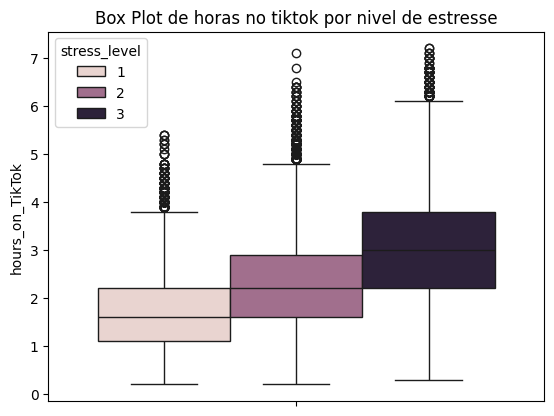

In [ ]:
sns.boxplot(y='hours_on_TikTok', hue='stress_level', data=df)

plt.title('Box Plot de horas no tiktok por nivel de estresse')
plt.show()

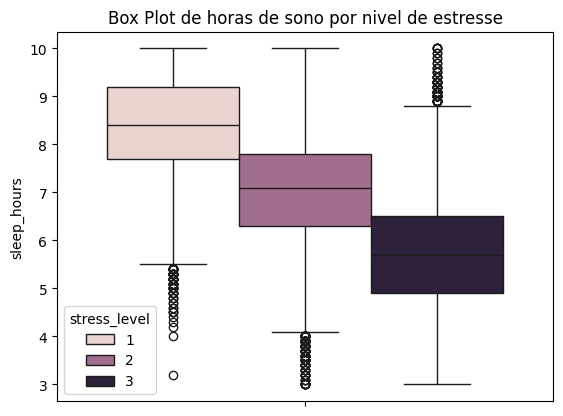

In [ ]:
sns.boxplot(y='sleep_hours', hue='stress_level', data=df)

plt.title('Box Plot de horas de sono por nivel de estresse')
plt.show()

Novamente os boxplots aumentam nossas suspeitas pricipalmente entre os grupos 1 e 3.

Os outliers serão tratados da mesma forma da ánalise anterior, porém a assimetria esta nos 3 grupos.

### Distribuição Nivel de Estresse

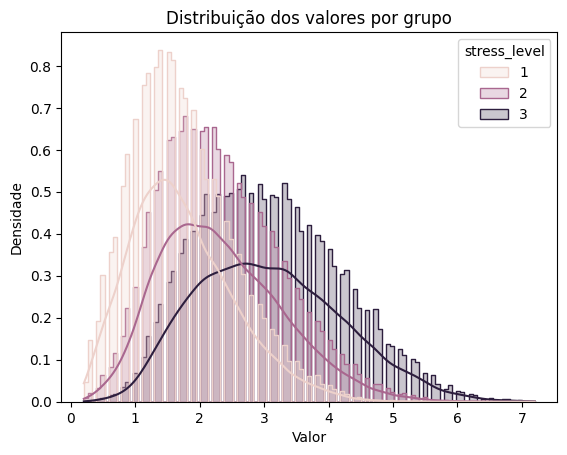

In [ ]:
sns.histplot(data=df, x='hours_on_TikTok', hue='stress_level', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição dos valores por grupo')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

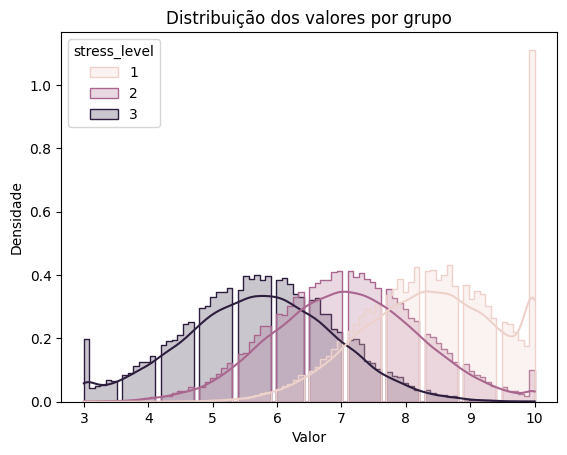

In [ ]:
sns.histplot(data=df, x='sleep_hours', hue='stress_level', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição dos valores por grupo')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

As distribuições são melhores que a da ánalise anterior porem não dão fortes indícios de serem normalmente distribuidas, mas é interessante que elas lembram bastante as distribuições do índice humor porém ao contrário já que para o nivel de estresse quanto maior o grupo pior a saúde do usuario.

### Testes de Normalidade Nível de Estresse

Seguindo os mesmos passos da ánalise anterior iremos fazer um teste para confirmar a normalidade dos grupos.

In [ ]:
for nome_grupo, grupo_df in df.groupby('stress_level'):
    if len(grupo_df) >= 20:
        stat, p = normaltest(grupo_df['hours_on_TikTok'])
        print(f"Grupo: {nome_grupo}")
        print(f"  Estatística: {stat:.4f}")
        print(f"  Valor-p: {p:.4f}")
        if p > 0.05:
            print(" Distribuição normal (não rejeita H0)")
        else:
            print(" Não é normal (rejeita H0)")
        print()
    else:
        print(f"Grupo {nome_grupo} tem menos de 20 elementos — teste ignorado.\n")


Grupo: 1
  Estatística: 1420.3590
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 2
  Estatística: 2394.5712
  Valor-p: 0.0000
 Não é normal (rejeita H0)

Grupo: 3
  Estatística: 684.5200
  Valor-p: 0.0000
 Não é normal (rejeita H0)



In [ ]:
for nome_grupo, grupo_df in df.groupby('stress_level'):
    if len(grupo_df) >= 20:
        stat, p = normaltest(grupo_df['sleep_hours'])
        print(f"Grupo: {nome_grupo}")
        print(f"  Estatística: {stat:.4f}")
        print(f"  Valor-p: {p:.4f}")
        if p > 0.05:
            print(" Distribuição normal (não rejeita H0)")
        else:
            print(" NÃO é normal (rejeita H0)")
        print()
    else:
        print(f"Grupo {nome_grupo} tem menos de 20 elementos — teste ignorado.\n")


Grupo: 1
  Estatística: 598.8302
  Valor-p: 0.0000
 NÃO é normal (rejeita H0)

Grupo: 2
  Estatística: 35.6648
  Valor-p: 0.0000
 NÃO é normal (rejeita H0)

Grupo: 3
  Estatística: 41.7605
  Valor-p: 0.0000
 NÃO é normal (rejeita H0)



De acordo com os resultados dos testes não podemos afirmar que os grupos tem distribuição normal e portanto seguiremos o resto das ánalises com o teste de Kruskal-Wallis.

# Teste de Média Nivel de Estresse

Agora iremos novamente realizar o teste para confirmar se há alguma diferença estatísticamente significante entre as médias, de horas no tik tok e de sono, para cada grupo com:


H0: Não há diferença significativa entre as médias dos grupos

H1: Há diferença significativa entre as médias dos grupos

In [ ]:
grupos = [grupo_df['hours_on_TikTok'].values for nome, grupo_df in df.groupby('stress_level')]

stat, p = kruskal(*grupos)

print(f'Estatística H: {stat:.4f}')
print(f'Valor-p: {p:.4f}')

if p > 0.05:
    print("Não há diferença significativa entre as médias dos grupos (não rejeita H0)")
else:
    print("Há diferença significativa entre as médias dos grupos (rejeita H0)")

Estatística H: 18548.1875
Valor-p: 0.0000
Há diferença significativa entre as médias dos grupos (rejeita H0)


In [ ]:
grupos = [grupo_df['sleep_hours'].values for nome, grupo_df in df.groupby('stress_level')]


stat, p = kruskal(*grupos)

print(f'Estatística H: {stat:.4f}')
print(f'Valor-p: {p:.4f}')

if p > 0.05:
    print("Não há diferença significativa entre as médias dos grupos (não rejeita H0)")
else:
    print("Há diferença significativa entre as médias dos grupos (rejeita H0)")

Estatística H: 39700.9977
Valor-p: 0.0000
Há diferença significativa entre as médias dos grupos (rejeita H0)


De acordo com o resultado dos testes rejeitamos a H0 para ambos, e portanto as médias tem diferença estatísticamente significante e temos fortes evidências de que ambas variáveis tem influência no nível de estresse.

# Conclusão

As analises foram feitas para confirmar que a média dos grupos, em relação a horas passadas no tiktok e também a horas de sono, são iguais. Essa hipótese serviu como hipótese nula nos testes, porém de acordo com os resultados o valor p dos testes foi bem inferior a 0,01 e a hipótese nula foi fortemente rejeitada. Esses resultados dão fortes evidências de que a média dos grupos é diferente e portanto de que pode haver uma influência das horas passadas no tiktok e a saùde mental dos usuarios.